Proyek Machine Learning :
**Rekomendasi Film**

Topik : Rekomendasi Film

Tujuan : Memberikan rekomendasi film berdasarkan preferensi konsumen dengan memanfaatkan popularitas

Dataset yang digunakan : https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system?select=ratings.csv



Melakukan Import terhadap Library yang diperlukan

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re

pandas: Digunakan untuk memanipulasi data dalam
bentuk tabel (DataFrame).
numpy: Digunakan untuk operasi numerik.

matplotlib.pyplot dan seaborn: Digunakan untuk visualisasi data.


**DATA UNDERSTANDING**

In [2]:
movies = pd.read_csv("/content/movies.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.isna().sum()

,0
movieId,0
title,0
genres,0


In [4]:
print("Jumlah duplikat:", movies.duplicated().sum())

Jumlah duplikat: 0


In [5]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [6]:
rating = pd.read_csv("/content/ratings.csv")

rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
rating.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [8]:
rating.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [9]:
#Menggabungkan tabel movie dan ratings
movie_review = pd.merge(movies, rating, on='movieId')
movie_review

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


**Exploratory Data Analysis (EDA)**

---

Tahap eksplorasi sangat penting untuk memahami variabel-variabel dalam data serta hubungan antar variabel. Pemahaman ini akan memandu kita dalam memilih pendekatan atau algoritma yang tepat. Sebaiknya, eksplorasi data dilakukan terhadap seluruh variabel untuk memperoleh gambaran yang komprehensif. Exploratory Data Analysis (EDA) memiliki peran krusial dalam memahami dataset secara mendalam dan menyeluruh.

---

Berikut adalah beberapa pertanyaan yang akan kita jawab dengan menggunakan EDA untuk sistem rekomendasi Film, berdasarkan informasi yang diberikan:



Dengan EDA, kita bisa mengeksplorasi berbagai pola yang muncul dalam dataset film yang diberikan oleh pengguna, serta menganalisis preferensi dan tren terkait film.


*Kita akan mengeksplorasi data sesuai dengan pertanyaan diatas.*

**1. Bagaimana distribusi rating yang diberikan oleh pengguna terhadap film?**

Pertanyaan ini akan membantu kita memahami sebaran rating yang diberikan oleh pengguna, apakah ada kecenderungan rating tinggi atau rendah, dan apakah rating lebih sering diberikan pada film-film tertentu.

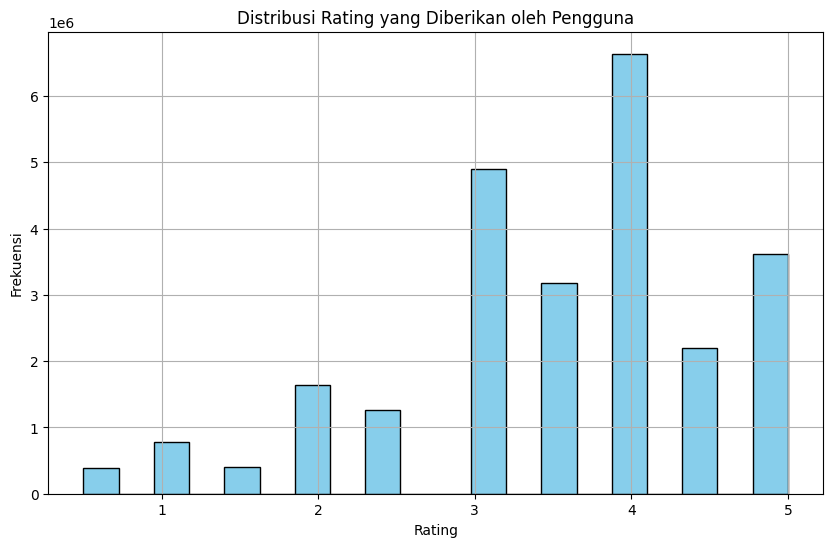

In [10]:
import matplotlib.pyplot as plt

# Visualisasi distribusi rating yang diberikan oleh pengguna
plt.figure(figsize=(10,6))
plt.hist(movie_review['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating yang Diberikan oleh Pengguna')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


**Apakah ada hubungan antara jumlah rating yang diberikan oleh pengguna dengan rating rata-rata yang mereka berikan?**

Pertanyaan ini bertujuan untuk mengeksplorasi apakah pengguna yang memberikan lebih banyak rating cenderung memberikan rating yang lebih tinggi atau lebih rendah secara konsisten. Misalnya, apakah pengguna yang aktif menilai banyak film cenderung memberikan rating tinggi pada semua film atau lebih cenderung memberi rating lebih rendah.

Untuk menjawab pertanyaan ini, kita akan menghitung jumlah rating yang diberikan oleh masing-masing pengguna dan mengukur rata-rata rating mereka. Kemudian, kita dapat memvisualisasikan hubungan antara jumlah rating yang diberikan dan rating rata-rata yang diberikan oleh pengguna.

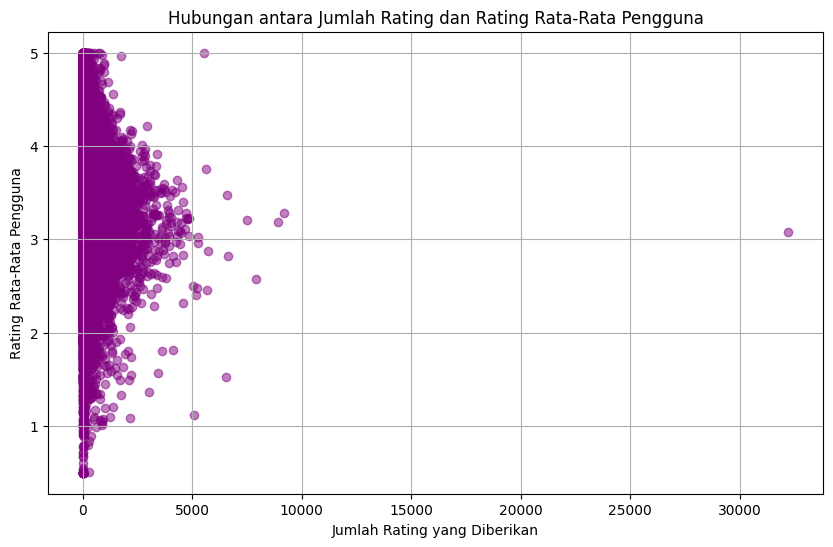

Korelasi antara jumlah rating dan rating rata-rata: -0.1747159451043273


In [11]:
# Menghitung jumlah rating yang diberikan oleh setiap pengguna
user_rating_count = movie_review.groupby('userId')['rating'].count()

# Menghitung rating rata-rata yang diberikan oleh setiap pengguna
user_avg_rating = movie_review.groupby('userId')['rating'].mean()

# Menggabungkan jumlah rating dan rating rata-rata dalam satu dataframe
user_rating_summary = pd.DataFrame({
    'rating_count': user_rating_count,
    'avg_rating': user_avg_rating
})

# Visualisasi hubungan antara jumlah rating dan rating rata-rata
plt.figure(figsize=(10,6))
plt.scatter(user_rating_summary['rating_count'], user_rating_summary['avg_rating'], alpha=0.5, color='purple')
plt.title('Hubungan antara Jumlah Rating dan Rating Rata-Rata Pengguna')
plt.xlabel('Jumlah Rating yang Diberikan')
plt.ylabel('Rating Rata-Rata Pengguna')
plt.grid(True)
plt.show()

# Menghitung korelasi antara jumlah rating dan rating rata-rata
correlation = user_rating_summary['rating_count'].corr(user_rating_summary['avg_rating'])
print(f"Korelasi antara jumlah rating dan rating rata-rata: {correlation}")


**DATA PREPARATION**

In [12]:
data = movie_review
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [13]:
#Mengatasi Missing Value
data = data.dropna()

In [14]:
#Mengatasi Missing Value
data.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,0
rating,0
timestamp,0


In [15]:
fix_rating = data.sort_values('genres', ascending=False)
fix_rating

,movieId,title,genres,userId,rating,timestamp
13713372,3487,El Dorado (1966),Western,70141,4.5,1215536247
24208302,128360,The Hateful Eight (2015),Western,159504,3.0,1467495248
24208291,128360,The Hateful Eight (2015),Western,159132,3.0,1543747593
24208292,128360,The Hateful Eight (2015),Western,159144,3.0,1543250189
24208293,128360,The Hateful Eight (2015),Western,159146,2.0,1530475573
...,...,...,...,...,...,...
24494055,150906,How Much Does the Trojan Horse Weigh? (2008),(no genres listed),88556,3.0,1500914866
24494054,150906,How Much Does the Trojan Horse Weigh? (2008),(no genres listed),61465,1.0,1523009529
24494053,150906,How Much Does the Trojan Horse Weigh? (2008),(no genres listed),47929,2.5,1453064996
24494052,150906,How Much Does the Trojan Horse Weigh? (2008),(no genres listed),41445,3.5,1553900137


In [16]:
#Variabel preparation
preparation = fix_rating[['title', 'genres', 'rating']]
preparation.sort_values('genres', ascending=True)

,title,genres,rating
24407566,One. Two. One (2011),(no genres listed),3.0
24814030,North of the Sun (2012),(no genres listed),5.0
24814021,Pitch Black Heist (2011),(no genres listed),3.5
24814029,North of the Sun (2012),(no genres listed),5.0
24814028,North of the Sun (2012),(no genres listed),5.0
...,...,...,...
15296201,Rio Bravo (1959),Western,4.0
12816865,Little Big Man (1970),Western,4.0
12816890,Little Big Man (1970),Western,5.0
12816868,Little Big Man (1970),Western,4.5


In [41]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('title')
preparation

,title,genres,rating
13713372,El Dorado (1966),Western,4.5
24208302,The Hateful Eight (2015),Western,3.0
23637180,"Time for Killing, A (1967)",Western,3.0
17482435,Bend of the River (1952),Western,3.5
23156672,Straight Shooting (1917),Western,4.0
...,...,...,...
24493963,Ajlawju (1999),(no genres listed),3.5
24494133,Old 37 (2015),(no genres listed),2.5
24494137,Spirit of Youth (1938),(no genres listed),2.5
24494077,Vendetta for the Saint (1979),(no genres listed),4.0


In [43]:
import pandas as pd

# Misalkan title_list, genres_list, rating_list sudah ada dan berisi data

# Ambil 10000 data pertama
preparation = preparation.head(10000)

# Menampilkan data movie_new_10000
print(preparation)


                                     title         genres  rating
13713372                  El Dorado (1966)        Western     4.5
24208302          The Hateful Eight (2015)        Western     3.0
23637180        Time for Killing, A (1967)        Western     3.0
17482435          Bend of the River (1952)        Western     3.5
23156672          Straight Shooting (1917)        Western     4.0
...                                    ...            ...     ...
24255941              Sincere Heart (1953)  Drama|Romance     3.5
23270100  Girl on a Motorcycle, The (1968)  Drama|Romance     4.0
17231341         All the Real Girls (2003)  Drama|Romance     4.0
22201737           Summer and Smoke (1961)  Drama|Romance     3.5
24661831           Finishing School (1934)  Drama|Romance     3.5

[10000 rows x 3 columns]


In [44]:
#konversi data menjadi list
#Mengonversi data series 'title' menjadi dalam bentuk list
title_list = preparation['title'].tolist()

#Mengonversi data series 'genres' menjadi dalam bentuk list
genres_list = preparation['genres'].tolist()

#Mengonversi data series 'rating' menjadi dalam bentuk list
rating_list = preparation['rating'].tolist()

print(len(title_list))
print(len(genres_list))
print(len(rating_list))


10000
10000
10000


In [45]:
#Membuat Dictonary untuk menentukan pasangan Key - Value pada data yang telah di siapkan
movie_new = pd.DataFrame({'title': title_list, 'genres': genres_list, 'rating': rating_list})
movie_new

,title,genres,rating
0,El Dorado (1966),Western,4.5
1,The Hateful Eight (2015),Western,3.0
2,"Time for Killing, A (1967)",Western,3.0
3,Bend of the River (1952),Western,3.5
4,Straight Shooting (1917),Western,4.0
...,...,...,...
9995,Sincere Heart (1953),Drama|Romance,3.5
9996,"Girl on a Motorcycle, The (1968)",Drama|Romance,4.0
9997,All the Real Girls (2003),Drama|Romance,4.0
9998,Summer and Smoke (1961),Drama|Romance,3.5


In [46]:
#konversi semuanya ke object
movie_new = movie_new.astype(object)

In [47]:
movie_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   genres  10000 non-null  object
 2   rating  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


**Model Development dengan Content Based Filtering**

Setelah melakukan serangkaian tahapan :
- Data Understanding.
- Univariate Exploratory Data Analysis.
- Data Preprocessing.
- Data Preparation.

sekarang saatnya untuk kita mengembangkan model sistem rekomendasi dalam hal ini kita menggunakan pendekatan content based filtering.

In [48]:
data = movie_new
data.sort_values('genres', ascending=True)

,title,genres,rating
9999,Finishing School (1934),Drama|Romance,3.5
9025,Great Expectations (1999),Drama|Romance,2.5
9026,Chronicle of a Blood Merchant (2015),Drama|Romance,2.5
9027,Guzaarish (2010),Drama|Romance,5.0
9028,Sadece Sen (2014),Drama|Romance,4.0
...,...,...,...
282,Riding Shotgun (1954),Western,2.0
283,The Last Challenge (1967),Western,3.0
284,The Way Back (1957),Western,3.0
207,Barquero (1970),Western,3.0


In [49]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#inisialisasi TF-IDF Vectorizer
tf = TfidfVectorizer()

#melakukan perhitungan TF IDF pada followers
tf.fit(data['genres'])

#Mapping array dari fitur index integer ke fitur utama
tf.get_feature_names_out()


array(['drama', 'fantasy', 'fi', 'film', 'horror', 'imax', 'musical',
       'mystery', 'noir', 'romance', 'sci', 'thriller', 'war', 'western'],
      dtype=object)

In [50]:
#Melakukan fit lalu di transformasikan dalam bentuk matrix
tf_matrix = tf.fit_transform(data['genres'])
tf_matrix.shape

(10000, 14)

In [51]:
#Mengubah vektor tf-idf dalam bentuk matrix dengan fungsi todense()
tf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.62838371, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.62838371, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.62838371, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [53]:
#Membuat dataframe untuk melihat tf-id matrix, kolomnya di isi dengan dataframe title dan author order by matriks yang bernilai 1
pd.DataFrame(
    tf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(10, axis=1).sample(10, axis=0)

,fantasy,imax,film,war,romance,noir,western,sci,drama,horror
title,,,,,,,,,,
M.F.A. (2017),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Night Must Fall (1937),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Pathey Holo Deri,0.0,0.0,0.0,0.0,0.777904,0.0,0.0,0.000000,0.628384,0.000000
"Invisible Woman, The (2013)",0.0,0.0,0.0,0.0,0.777904,0.0,0.0,0.000000,0.628384,0.000000
Alexia (2013),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.720578
Newness (2017),0.0,0.0,0.0,0.0,0.777904,0.0,0.0,0.000000,0.628384,0.000000
The Nurse (2017),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000
Perfect Sense (2011),0.0,0.0,0.0,0.0,0.470713,0.0,0.0,0.562960,0.380238,0.000000
Dirty Dancing: Havana Nights (2004),0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000


In [54]:
# #Consine Similarity
# # Pada tahap sebelumnya, kita telah berhasil mengidentifikasi korelasi antara movie dengan kategori movienya. Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar restoran dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn.
from sklearn.metrics.pairwise import cosine_similarity

# # Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tf_matrix)
cosine_sim


array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [55]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


title,Cult (2013),Coven (2000),"Burmese Harp, The (Biruma no tategoto) (1956)",Pharaoh's Curse (1957),Spiders (2000)
title,,,,,
Smile (2009),0.305439,0.720578,0.000000,0.720578,0.316602
Necromancer (1988),0.305439,0.720578,0.000000,0.720578,0.316602
Le nid (2018),0.000000,0.000000,0.365974,0.000000,0.000000
Happy Birthday to Me (1981),0.213569,0.503843,0.000000,0.503843,0.221374
I Stand Alone (Seul contre tous) (1998),0.000000,0.000000,0.365974,0.000000,0.000000
Ugly (2013),0.000000,0.000000,0.000000,0.000000,0.000000
Other Men's Women (1931),0.000000,0.000000,0.322871,0.000000,0.000000
Beast in Space (1980),0.000000,0.000000,0.000000,0.000000,0.898306
"Whistle Blower, The (1986)",0.000000,0.000000,0.000000,0.000000,0.000000


Dengan cosine similarity, kita berhasil mengidentifikasi tingkat kesamaan antara satu film dengan film lainnya. Shape (10000, 10000) mengindikasikan ukuran matriks kesamaan dari data yang kita miliki. Matriks ini berukuran 10000 film x 10000 film, yang menunjukkan tingkat kesamaan antara 10000 film yang ada dalam dataset. Namun, kita tidak dapat menampilkan keseluruhan matriks karena ukurannya yang sangat besar, sehingga hanya sebagian kecil yang dapat kita tampilkan.

Pada contoh di atas, matriks yang ditampilkan mencakup sebagian dari 10000 film, di mana baris vertikal (sumbu Y) mewakili film yang diuji, dan kolom horizontal (sumbu X) mewakili film yang dibandingkan. Dalam hal ini, kita hanya memilih untuk menampilkan 5 film pada sumbu horizontal dan 5 film pada sumbu vertikal dari matriks kesamaan yang lebih besar.

Perhatikan angka-angka yang ada di dalam matriks tersebut, yang mewakili cosine similarity antara film pada baris dan kolom yang bersesuaian. Misalnya, film "Smile (2009)" memiliki tingkat kesamaan 0.305 dengan "Cult (2013)", 0.721 dengan "Coven (2000)", dan 0.000 dengan "Burmese Harp, The (Biruma no tategoto) (1956)". Nilai-nilai ini menunjukkan sejauh mana dua film tersebut memiliki kesamaan berdasarkan genre, rating, atau fitur lain yang digunakan dalam perhitungan cosine similarity.

Sebagai contoh, film "Smile (2009)" dan "Necromancer (1988)" memiliki tingkat kesamaan yang cukup tinggi, yaitu 0.305. Ini mengindikasikan bahwa kedua film ini memiliki karakteristik atau fitur yang cukup mirip. Di sisi lain, film "Ugly (2013)" tidak memiliki kesamaan yang signifikan dengan film lainnya dalam subset ini, yang tercermin dari nilai-nilai 0.0 di seluruh kolomnya.

Secara keseluruhan, matriks ini memungkinkan kita untuk mengidentifikasi pasangan-pasangan film yang memiliki kemiripan berdasarkan kriteria yang digunakan dalam perhitungan similarity, yang dapat digunakan untuk membuat sistem rekomendasi film yang lebih akurat.

In [63]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=10):
    # Mencari indeks film yang sesuai dengan judul yang diberikan
    idx = similarity_data.index.get_loc(title)

    # Mengambil nilai similarity untuk film yang dicari
    similarity_scores = similarity_data.iloc[idx]

    # Menemukan k film dengan kesamaan tertinggi selain film yang dicari
    similar_indexes = similarity_scores.argsort()[-(k+1):-1][::-1]  # Ambil k film teratas dan urutkan secara menurun

    # Menampilkan hasil rekomendasi, dengan menghapus film yang sama dengan input (title)
    recommendations = similarity_data.index[similar_indexes]

    # Menggabungkan hasil rekomendasi dengan informasi film
    recommended_movies = items[items['title'].isin(recommendations)].head(k)

    return recommended_movies


In [64]:
# Misalnya, Anda ingin mendapatkan rekomendasi untuk film berjudul 'Smile (2009)'
recommended_movies = movie_recommendations('Smile (2009)', cosine_sim_df, data[['title', 'genres']], k=10)

# Menampilkan rekomendasi
print(recommended_movies)


                                                title           genres
3265                                      Dogs (1976)  Horror|Thriller
3266                                Sanitarium (2013)  Horror|Thriller
3267                         Sadako vs. Kayako (2016)  Horror|Thriller
3268                                 Cassadaga (2011)  Horror|Thriller
3269                           The Evil Within (2017)  Horror|Thriller
3270                               Lake Placid (1999)  Horror|Thriller
3271                             Strait-Jacket (1964)  Horror|Thriller
3272                           Innkeepers, The (2011)  Horror|Thriller
3273  Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001)  Horror|Thriller
3276                                   Shrooms (2007)  Horror|Thriller
